<a href="https://colab.research.google.com/github/jyoti90655/HousePricePrediction/blob/main/houseproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#--Importing the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")#--Ignoring any warnings that we may encounter
sns.set_theme(style = 'whitegrid', context = 'paper', palette = 'pastel',font = 'Georgia', font_scale = 1.2)

In [ ]:
#--Loading the dataset
df = pd.read_csv("/content/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.shape

(20640, 10)

In [ ]:
#--Summary statistic
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#--Checking for null values and data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#--Sum of null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

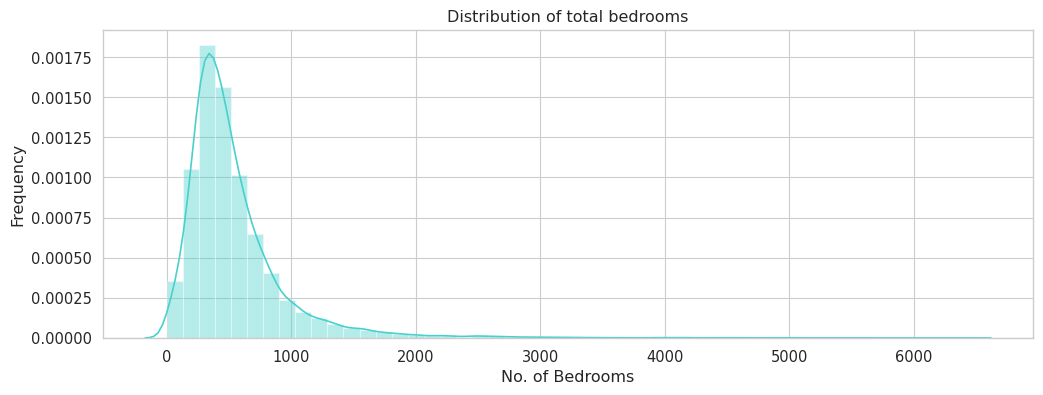

In [ ]:
#--Distribution of Total Bedrooms
plt.figure(figsize = (12,4))
sns.distplot(x = df['total_bedrooms'], color = 'mediumturquoise')
plt.title('Distribution of total bedrooms')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#--Filling null values in total_bedrooms
df['total_bedrooms'].fillna(value = df['total_bedrooms'].median(), inplace = True)

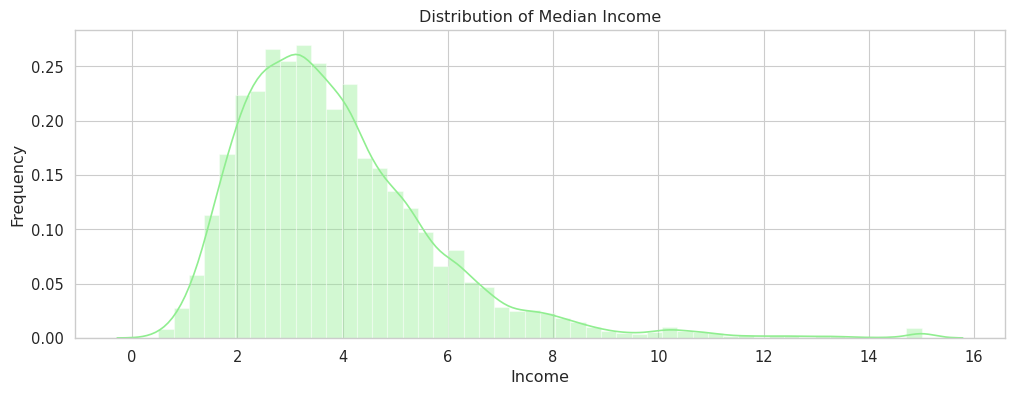

In [ ]:
#--Distribution of Median Income
plt.figure(figsize = (12,4))
sns.distplot(x = df['median_income'], color = 'lightgreen')
plt.title('Distribution of Median Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

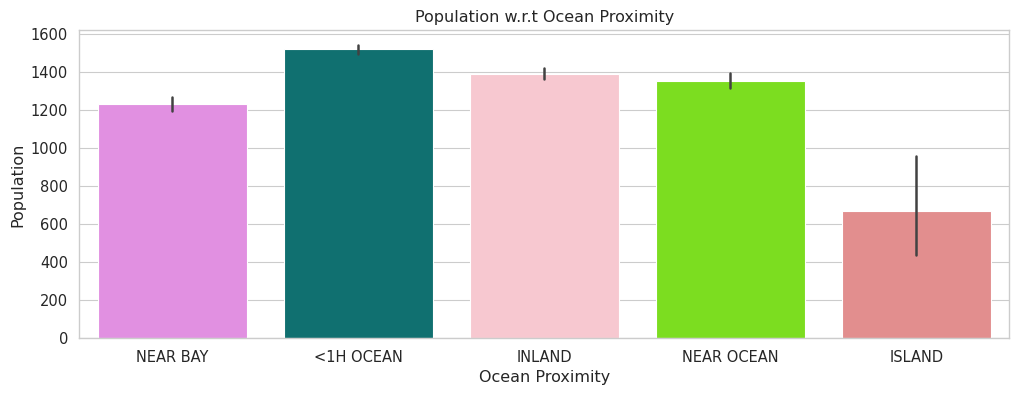

In [ ]:
#--Population in California based on Ocean Proximity
plt.figure(figsize = (12,4))
sns.barplot(x = 'ocean_proximity', y = 'population', data = df,palette = ['violet', 'teal', 'pink','lawngreen','lightcoral'])
plt.title('Population w.r.t Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Population')
plt.show()

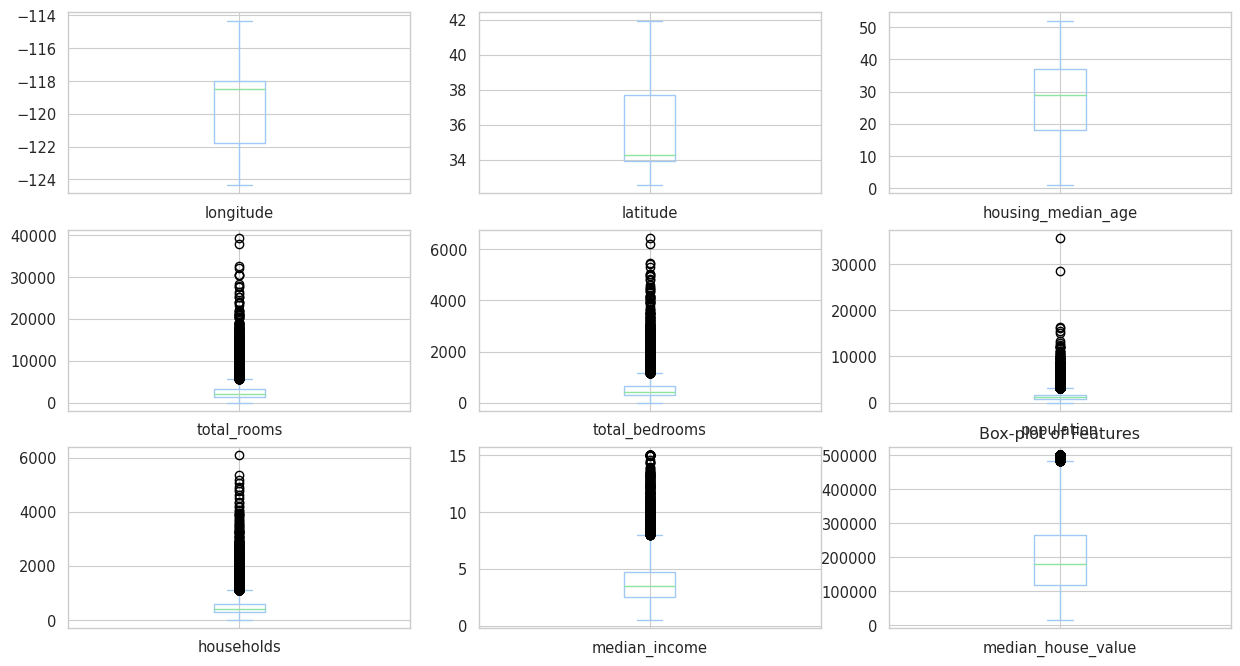

In [ ]:
#--Boxplot of all the variables in dataset
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,8))
plt.title('Box-plot of Features')
plt.show()

In [ ]:
#--Creating a new column for EDA
df['house_age'] = [1 if x < 30 else 0 for x in df['housing_median_age']]

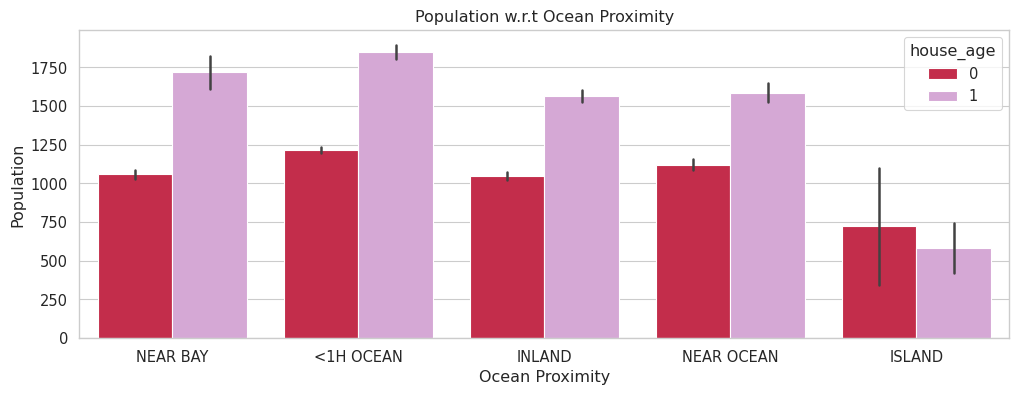

In [ ]:
#--Population distribution based on house age
plt.figure(figsize = (12,4))
color = ['crimson', 'plum']
sns.barplot(x = 'ocean_proximity', y = 'population', data = df, hue = 'house_age', palette = color)
plt.title('Population w.r.t Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Population')
plt.show()

In [ ]:

geo_df = df[['longitude','latitude']].head(10)
import folium
map_center = [geo_df['latitude'].mean(), geo_df['longitude'].mean()]
zoom_level = 4
map_object = folium.Map(location=map_center, zoom_start=zoom_level)


for _, row in geo_df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(map_object)

map_object

<Figure size 1000x700 with 0 Axes>

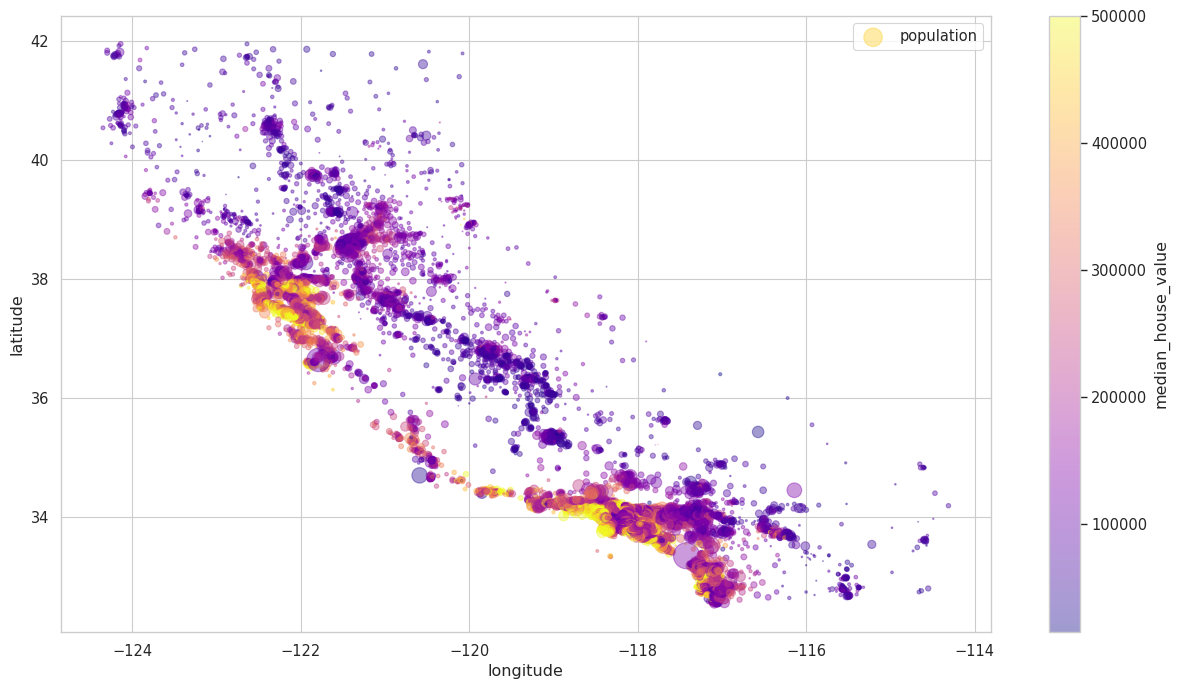

In [ ]:
#--Population based on location
plt.figure(figsize=(10,7));
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=df["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap='plasma',colorbar=True,
    );
plt.legend();

In [ ]:
def corrMat(df, show_cbar=True, figsize=(6, 6)):
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr_mat, vmin=-1, vmax=1, center=0,
                cmap='Set3', square=False, linewidths=2, annot=True, cbar=show_cbar)
    plt.show()

In [ ]:
#--Encoding Categorical Variable
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = pd.DataFrame(encoder.fit_transform(
    df[['ocean_proximity']]).toarray())

final_df = df.join(encoded_data)

final_df.rename(columns = {0:'Ocean',1:'Inland',2:'Island',3:'Near Bay',4:'Near Ocean'}, inplace = True)
final_df.reset_index(inplace = True)

In [ ]:
final_df.drop(columns = {'index'}, inplace = True)
final_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,house_age,Ocean,Inland,Island,Near Bay,Near Ocean
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0.0,0.0,0.0,1.0,0.0


Model Building

In [ ]:
#--Train and Test dataset
X = final_df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'Ocean', 'Inland',
       'Island', 'Near Bay', 'Near Ocean']]
Y = final_df[['median_house_value']]

In [ ]:
#--Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X,Y, random_state = 42, test_size = .30)

In [ ]:
#--Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_x = X.copy()
vif_df["feature"] = vif_x.columns
vif_df["VIF"] = [variance_inflation_factor(vif_x.values, i)
                          for i in range(len(vif_x.columns))]

vif_df.head()

,feature,VIF
0,longitude,18.028444
1,latitude,19.925764
2,housing_median_age,1.321927
3,total_rooms,12.349114
4,total_bedrooms,27.040073


In [ ]:
#--Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(X_train,Y_train)

In [ ]:
#--Importing GridsearchCV for best model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit

In [ ]:
#--UDF for selectiong the best model
def best_model_selection(X,y):
    models = {
        'Decision Tree Regression' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['auto', 'sqrt', 'log2']}
        },
        'Ridge Regression' : {
            'model' : Ridge(),
            'params': {
                'alpha': [0.1, 0.5, 1.0, 10.0]}
        },
        'Lasso Regression' : {
            'model' : Lasso(),
            'params' : {
                'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
            }
        },
        'Random Forest Regressor ' : {
            'model': RandomForestRegressor(),
            'params' : {
                'n_estimators': [10, 20, 30]
            }
        },

    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=0)
    for model_name, config in models.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model_selection(X_train,Y_train)

,model,best_score,best_params
0,Decision Tree Regression,0.710741,"{'max_depth': 10, 'max_features': 'auto', 'min..."
1,Ridge Regression,0.645865,{'alpha': 1.0}
2,Lasso Regression,0.645794,{'alpha': 10.0}
3,Random Forest Regressor,0.801211,{'n_estimators': 30}


In [ ]:
#--Building all the best models
best_linear = LinearRegression().fit(X_train, Y_train)
best_lasso = Lasso(alpha = 1).fit(X_train, Y_train)
best_ridge = Ridge(alpha = 10).fit(X_train, Y_train)
best_dc = DecisionTreeRegressor(max_depth = 10, max_features = 'auto', min_samples_leaf = 4,min_samples_split = 10).fit(X_train, Y_train)
best_rfr = RandomForestRegressor(n_estimators = 30).fit(X_train, Y_train)

In [ ]:
#--Y_pred for all the models
y_pred_linear = best_linear.predict(x_test)
y_pred_lasso = best_lasso.predict(x_test)
y_pred_ridge = best_ridge.predict(x_test)
y_pred_dc = best_dc.predict(x_test)
y_pred_rfr = best_rfr.predict(x_test)

In [ ]:
#--Evaluation metrics for regression models
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
#--Mean Absolute Error
mae_linear = mae(y_test,y_pred_linear)
mae_lasso = mae(y_test,y_pred_lasso)
mae_ridge = mae(y_test,y_pred_ridge)
mae_dc = mae(y_test,y_pred_dc)
mae_rfr = mae(y_test,y_pred_rfr)

In [ ]:
#--Mean Squared Error
mse_linear = mse(y_test,y_pred_linear)
mse_lasso = mse(y_test,y_pred_lasso)
mse_ridge = mse(y_test,y_pred_ridge)
mse_dc = mse(y_test,y_pred_dc)
mse_rfr = mse(y_test,y_pred_rfr)

In [ ]:
#--Coefficient of determination
r2_linear = r2_score(y_test,y_pred_linear)
r2_lasso = r2_score(y_test,y_pred_lasso)
r2_ridge = r2_score(y_test,y_pred_ridge)
r2_dc = r2_score(y_test,y_pred_dc)
r2_rfr = r2_score(y_test,y_pred_rfr)

In [ ]:
#--Evaluation Metrics df
eval_df = pd.DataFrame({'MAE':[mae_linear,mae_lasso,mae_ridge,mae_dc,mae_rfr],
                        'MSE':[mse_linear,mse_lasso,mse_ridge,mse_dc,mse_rfr],
                       'R2 Score' : [r2_linear,r2_lasso,r2_ridge,r2_dc,r2_rfr],
                    'Model': ['Linear Regression','Lasso Regression','Ridge Regression','Decision Trees','Random Forest']})
eval_df.head()

,MAE,MSE,R2 Score,Model
0,50078.098842,4.733529e+09,0.639361,Linear Regression
1,50079.193513,4.733672e+09,0.639350,Lasso Regression
2,50104.233599,4.738304e+09,0.638997,Ridge Regression
3,40932.427342,3.657303e+09,0.721357,Decision Trees
4,32210.753618,2.443894e+09,0.813804,Random Forest


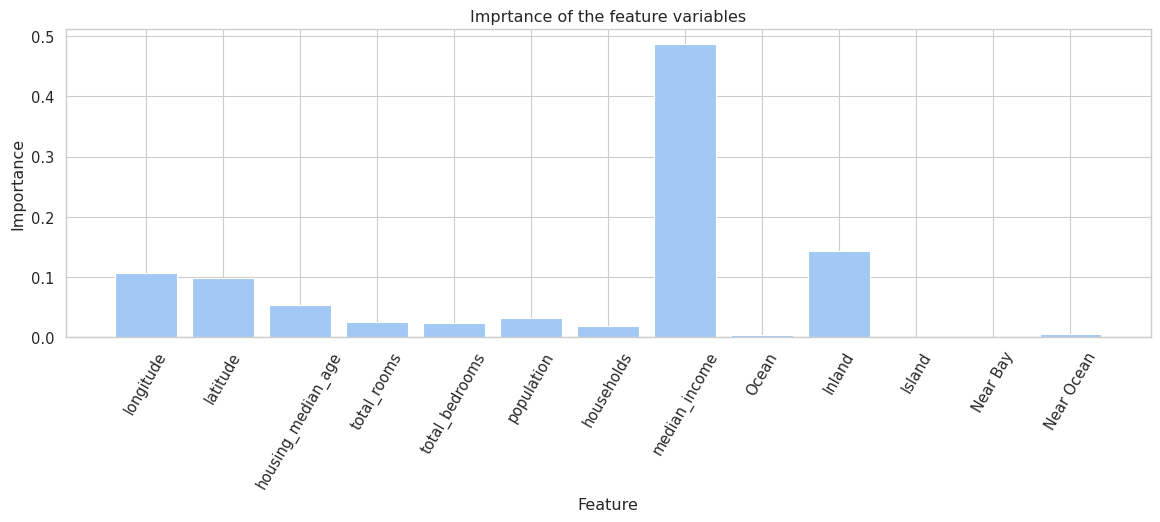

In [ ]:
#--Visulaizing coefficients of Random Forest
plt.figure(figsize = (14,4))
plt.bar(X.columns, best_rfr.feature_importances_)
plt.title('Imprtance of the feature variables')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation = 60)
plt.show()